Social Data Science WS20/21

# Home Assignment 4

### General Instructions

Submit your solution via Moodle until 23.59pm on Tuesday, February 2nd.
Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of 3-4 members.
Please denote all members of the team with their student ID and full name in the notebook.
Please submit only one notebook per team.
Only submit a notebook, do not submit the dataset(s) you used or image files that you have created - these have to be created from your notebook.
Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment.
In case of plagiarism (copying solutions from other teams or from the internet), ALL team members will be expelled from the course without warning.


### Evaluation and Grading

Evaluation of your submission is done semi-automatically.
Think of it as this notebook being executed once.
Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Make sure to restrict yourself to using packages that are automatically installed along with anaconda, plus some additional packages that have been introduced in context of this class. An overview of packages that may be used in this assignment can be found in the file 'environment.yaml'.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature and header of a function is usually specified in the task description and via code skeletons.
* Again, make sure that all your function as well as variable names match with what we have specified! The automated grading will only match these exact names, and everything that can not be matched will not be graded.
* Whenever there is a written task, e.g. task 1d), enter your answer in the specified markdown cell. Do NOT remove the label (e.g. '__A1d):__' ) from the markdown cell, as this will have to be parsed by the grading system and matched to your answer. 
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `pd.read_csv("example_filename.csv")` instead of `pd.read_csv("C:/User/Path/to/your/Homework/example_filename.csv")` so that the code directly works from our machines.
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points.
  Minimize usage of global variables.
* Ensure your code/notebook terminates in reasonable time.
* Textual answers must always be backed by code and may not refer to results that are not part of
  your submission.


**There's a story behind each of these points! Don't expect us to fix your stuff!**

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members (you may add or remove items from the list)
team_members = [
    {
        'first_name': 'Na Young',
        'last_name': 'Ahn',
        'student_id': 392326
    },
    {
        'first_name': 'Esther',
        'last_name': 'Tala',
        'student_id': 368095
    },
    {
        'first_name': 'Mika',
        'last_name': 'Rosin',
        'student_id': 395049
    },
    {
        'first_name': 'Laurin',
        'last_name': 'Ellenbeck',
        'student_id': 372280
    }
]

In [2]:
# general imports may go here
import nltk
from typing import List, Optional, Tuple

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Task 1: Stance Versus Sentiment (25 pts)


In this we will look into the differences between two commonly analyzed constructs when analyzing textual data from social media, namely _stance_ and *sentiment*. We will work with an openly available Twitter dataset for stance detection, which has been used in the [2016 SemEval challenge](https://alt.qcri.org/semeval2016/task6/index.php?id=data-and-tools#), also see [here](  http://www.saifmohammad.com/WebPages/StanceDataset.htm).
This datasets contains Tweet about a number of different political target issues, along with annotations regarding the stance towards the target, and the sentiment of a Tweet.  
This dataset has been adapted for this assignment, and both stance and senitment are encoded via integer values -1, 0 and 1. In that setting, the value -1 indicates a _negative_ stance or sentiment, 0 indicates a _neutral_ stance or sentiment, and 1 indicates a _positive_ stance or sentiment.

In [3]:
df_stance = pd.read_csv("tweets_annotated.csv", index_col = 0)
df_stance.head()

,Target,Tweet,Stance,Sentiment
ID,,,,
108,Atheism,Now that the SCOC has ruled Canadians have fre...,1,-1
118,Atheism,Celebrity atheism is beginning to irk me #init...,-1,-1
119,Atheism,Leaving Christianity enables you to love the p...,1,1
122,Atheism,Could all those who believe in a god please le...,1,-1
126,Atheism,"When it comes to scientific discoveries, the #...",1,-1


#### a) Analyzing Stance and Sentiment by Target (10 pts)

For each of the different targets in the data, plot the distributions of stances and sentiments againt each other in a grouped barplot. Specifically, each plot should contain three pairs of bars, one pair for _positive_ stance/sentiment, one for _neutral_ stance/sentiment, and one for _negative_ stance/sentiment. Obviously, the bars for stance should be in a different color than the bars for sentiment. Save your plots into a single file called **"stance_sentiment.png"**!

Do you observe differences in the distributions of these two constructs in general, and on specific targets? Write your answer into cell **A1a)**!

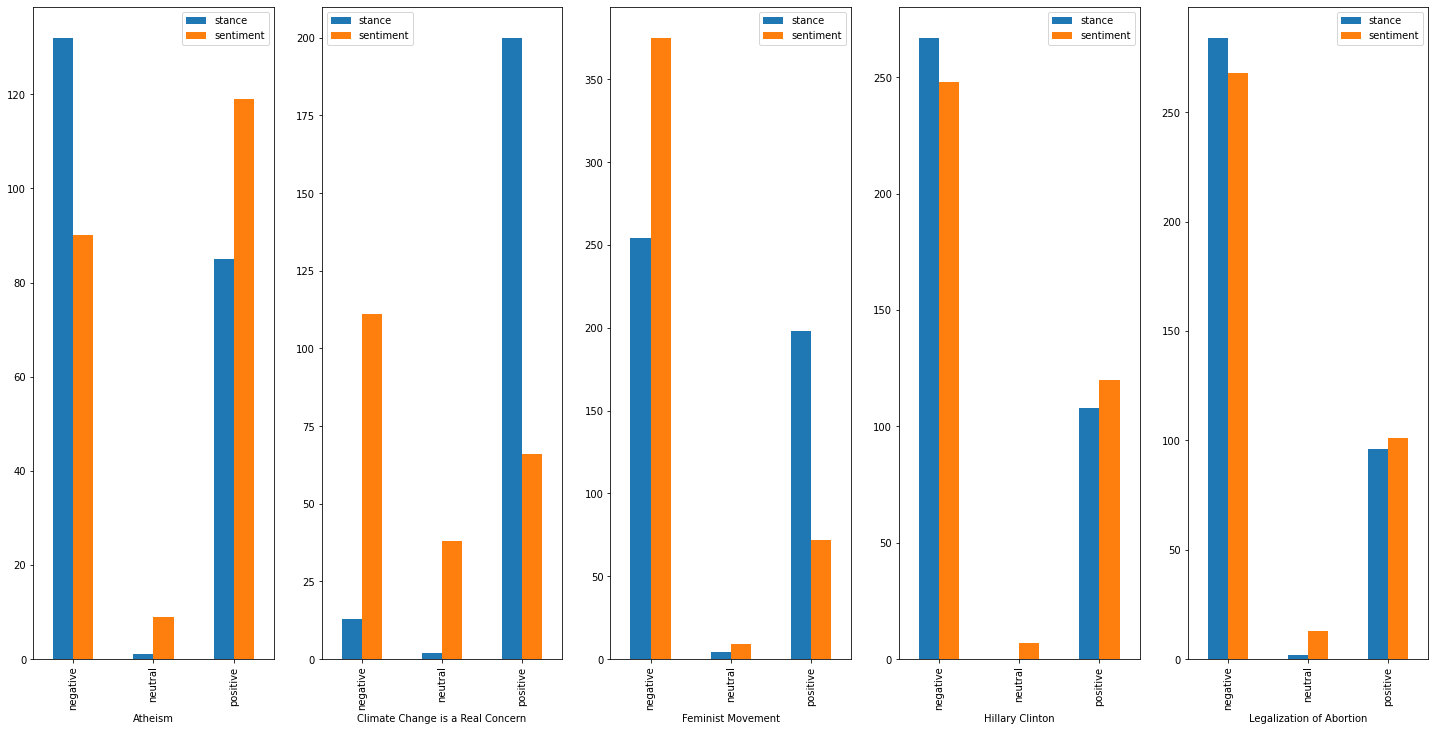

In [4]:
# stance
df_stance_grouped_stance = df_stance.groupby('Target').Stance.value_counts(normalize=False).unstack().T
df_stance_grouped_sentiment = df_stance.groupby('Target').Sentiment.value_counts(normalize=False).unstack().T

num_items= len(df_stance_grouped_sentiment.columns)
#fig, ax = plt.subplots( nrows= 2, ncols=num_items, figsize = (22,8), num=1)
df_stance_grouped_stance = df_stance_grouped_stance.T
df_stance_grouped_sentiment = df_stance_grouped_sentiment.T

i = 0 

fig, ax = plt.subplots( nrows= 1, ncols=num_items, figsize = (25,12))
for stance, sentiment in zip(df_stance_grouped_stance.iterrows(), df_stance_grouped_sentiment.iterrows()):
    
    stance = pd.DataFrame(stance[1]).reset_index()
    theme = stance.columns[1]
    stance = stance.rename(columns={stance.columns[1]: "stance", 'Stance': 'class'})
    sentiment = pd.DataFrame(sentiment[1]).reset_index()
    sentiment=sentiment.rename(columns={'Sentiment':'class', sentiment.columns[1] : 'sentiment'})
    concat = stance.set_index('class').join(sentiment.set_index('class'), on='class').rename_axis(theme).rename({-1:'negative', 0:'neutral', 1:'positive'})
    concat.plot.bar(ax=ax[i]) 
    i+=1
plt.savefig("stance_sentiment.png")
plt.show()

**A1a):** Stance and Sentiment showed similar distribution for three out of five targets: Legalization of Abortion, Hilary Clinton and Feminist Movement. As for Feminist Movement, the difference between negative and positive was greater under sentiment. Two targets: Atheism and Climate Change is a Real Concern, show opposite majority result. For Atheism, negative stance is highest while positive sentiment is highest. As for Climate Change is a Real Concern, results showed a predominately positive stance while the negative sentiment was the highest. We also observe higher number of neutral responses in the sentiment for these two targets.

#### b) Comparing Overall Distributions (5 pts)

Cross-tabulate the absolute occurences of the different sentiments and stances over all instances in the data, regardless of the target. Save these cross-tabulated counts into a pandas dataframe ```xtab_stance```, where rows represent the stances, and columns represent the sentiments. Make sure to label the row and column indices appropriately.
To what extent do these two constructs agree or disagree in general? Write your answer into cell **A1b)**!

In [5]:
Stance = df_stance.Stance
Sentiment = df_stance.Sentiment
xtab_stance = pd.crosstab(Stance, Sentiment)
xtab_stance

Sentiment,-1,0,1
Stance,,,
-1,705,16,229
0,5,3,1
1,382,57,248


**A1b):** The two constructs agree in about 58 percent of the time.

#### c) Deploying VADER (3 pts)

We want to assess the accuracy of the VADER sentiment analyzer that is also built into the ```nltk``` package (cf. exercise 11).
To convert the numerical _compound_ sentiment score, which is returned from the ```polarity_scores()``` function into the three classes, we will consider all scores lower than $0.1$ as *negative*, all scores in the interval $[-0.1,0.1]$ as *neutral*, and each score bigger than $0.1$ as *positive*. 
Apply the VADER sentiment analyzer on the complete data, convert the scores into classes as described above, and save the resulting classisfications into a vector ```y_vader```!

In [6]:
# download vader_lexicon if you haven't done so already
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# prepare input data
tweets = df_stance.Tweet
results = []
length = len(df_stance.index)
for i in range(length):
    score = analyzer.polarity_scores(df_stance.Tweet.iloc[i])['compound']
    if score < -0.1: 
        results.append(-1)
    elif score > 0.1: 
        results.append(1)
    else:
        results.append(0)

results = pd.DataFrame(results).rename(columns={0: 'classes'})

[nltk_data] Downloading package vader_lexicon to /home/mr/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
y_vader = results

#### d) Evaluating Predictions (7 pts)

Compare your predictions from task c) with the true sentiment as well as the true stance of each tweet in the data. Towards that end, compute the both the confusion matrix as well as the accuracy of your predictions ```y_vader``` with respect to the true sentiments and stances in the data. 
Store the corresponding confusion matrices and accruracies into variables ```cm_stance```, ```acc_stance```, ```cm_sentiment```, and ```acc_sentiment```, respectively.

Based on the results, do you think that VADER is suited to either predict stance or sentiment of Tweets? Write and explain your answer in cell **A1d)**!

In [8]:
cm_stance = confusion_matrix( df_stance.Stance.to_numpy(),results.to_numpy().squeeze(), labels=[-1, 0, 1])
acc_stance = accuracy_score(y_true=df_stance.Stance.to_numpy(), y_pred=results.to_numpy().squeeze(), normalize=True)
print ('acc_stance = ', acc_stance, '\n', 'cm_stance: \n ', cm_stance)

acc_stance =  0.3772782503037667 
 cm_stance: 
  [[329 264 357]
 [  5   3   1]
 [207 191 289]]


In [9]:
cm_sentiment = confusion_matrix( df_stance.Sentiment.to_numpy(),results.to_numpy().squeeze(), labels=[-1, 0, 1])
acc_sentiment =  accuracy_score(y_true=df_stance.Sentiment.to_numpy(), y_pred=results.to_numpy().squeeze(), normalize=True)
print ('acc_sentiment = ', acc_sentiment, '\n', 'cm_sentiment: \n ', cm_sentiment)

acc_sentiment =  0.4975698663426488 
 cm_sentiment: 
  [[474 302 316]
 [ 10  40  26]
 [ 57 116 305]]


**A1d):** VADER is more suited to predict sentiment than stance, but the accuracy is lower than 50 percent in both predictions. The accuracy we get from the stance is only slightly better than the percentage we get from guessing the class randomly (0.33 from guessing vs 0.37 from stance prediction). Whether VADER is more suited to predict stance or sentiment also highly depends on how well stance correlates to sentiment.

### Task 2: Basic Text Mining (45 pts)

In this task we will illustrate some basic, traditional text mining methods which can be used to perform sentiment. If you are interested in this topic, our chair teaches more advanced methods in our _Text Mining_ class.  
The data we are using in this task is a set of 10000 product reviews from *Epinions*, which was was a general consumer review website which has now been shut down.
The data was taken and adapted from the [UCSD Repository of Recommender Systems Datasets](https://cseweb.ucsd.edu/~jmcauley/datasets.html).

In the cells below, we read in the textual reviews into a list ```reviews```, and the corresponding ratings (values between 1 and 5, with 5 being the best score) into a numpy array ```ratings```.

In [10]:
### read in data

# read in reviews
with open("epinions.txt") as f:
    reviews = f.readlines()
reviews = [x.strip() for x in reviews] 
f.close()

# read in ratings
ratings = np.loadtxt("epinions_ratings.txt", unpack=False)

In [11]:
# feel free to explore the reviews yourself
print(reviews[0])
print(ratings[0])


i got this printer from minolta as a warranty replacement for the minolta pagepro 1100l which didnt work under windows xp the unit is a little bulkier than the 1100l also the paper tray is fully enclosed however the plastic hinged top does not close as fully as the 1100l did and more dust gets into the printer
4.0


#### a) Building a Dictionary (5 pts)

Build a dictionary ```word_count```, which contains each word that occurs in the corpus as key, and the number of times that each word appears among all of the reviews as values.
To build that dictionary, iterate through all of the reviews in the data and apply the given tokenizer ```review_tokenizer``` to convert each review into a clean list of tokens which can then be fed into our dictionary of words (and their counts).

In [12]:
import string  

def review_tokenizer(review):
    t = review.lower() # lowercase
    t = [c for c in t if not (c in string.punctuation)] # remove punctuation
    t = ''.join(t) # convert back to string
    return t.strip().split() # tokenize


In [13]:
word_count = dict()

for review in reviews:
    tokens = review_tokenizer(review)
    for token in tokens:
        if token not in word_count:
            word_count[token] = 1 
        else:
            word_count[token] += 1


In [14]:
print(word_count["i"])
print(word_count["printer"])
print(word_count["dust"])
print(word_count["minolta"])

39519
834
135
43


#### b) Analyzing Word Counts (3 pts)

Determine the total number of **distinct** words in your data, and save this number into a variable ```n_words```.
Further, determine the 20 most frequent words occuring in the review data, and save them as a **list of (word,count)-tuples** into a variable ```most_freq_words```!

In [15]:
n_words = len(word_count)

In [16]:
most_freq_words = sorted(word_count.items(), key=lambda item: item[1])[-20:]

#### c) Building a Feature Matrix (10 pts)

For the rest of this task, we want to predict the star ratings based on the textual reviews. To do so, we have to convert textual data into a numerical matrix format. One simple ways to do this is to create a binary matrix, in which each column represents a word from a given dictionary, and each row represents a document (in our case, a review). Then each element of the matrix is either $1$, if the word represented by the column occurs in the document that the row represents, or $0$ otherwise.   
Write a function ```build_feature_matrix``` that implements this procedure, using the function signature specified in the cell below!

In [17]:
def build_feature_matrix(documents: List[str], dictionary: List[str], tokenizer = review_tokenizer) -> pd.DataFrame:
    """
    :param documents: list of strings, each string representing a document (in our case, a review)
    :param dictionary: list of strings, each string representing a word in our dictionary
    :param tokenizer: tokenizing function that has to be used to preprocess each document, 
    :                defaults to the given review_tokenizer
    :return: pandas dataframe of binary occurance scores - i-th row represents i-th document, 
    :        columns should be named after the word that they represent
    """
    
    rows = []
    
    for document in documents:
        tokens = review_tokenizer(document)
        row = [1 if i in tokens else 0 for i in dictionary]
        rows.append(row)
    
    return pd.DataFrame(rows, columns=dictionary)    

#### d) Sentiment Analysis (4 pts)

Apply your implementation from c) to build a feature matrix from the _Epinions_ reviews, based on a dictionary of **only the 1000 most frequent words** in the data. Train a ridge regression model ```reg_bin``` with regularization weight $\alpha = 1$ on the full data, and report the $r^2$ score obtained on the training data by saving it into the variable ```r2_2d```. 
Further, determine the words with the 10 highest, and the words with the 10 lowest regression weights, and save them as **lists of (word,weight)-tuples** into variables called ```l_highest_2d``` and ```l_lowest_2d```! 

In [18]:
from sklearn.linear_model import Ridge

zip_1d, _ = zip(*sorted(word_count.items(), key=lambda item: item[1])[-1000:])
most_freq_1000_words = zip_1d
df_bin_matrix = build_feature_matrix(reviews, most_freq_1000_words, review_tokenizer)
df_bin_matrix.head()

,60,allow,9,mop,arent,sent,land,alot,v8,parents,...,in,for,of,is,it,to,a,and,i,the
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,1


In [19]:
reg_bin = Ridge(alpha=1.0)
reg_bin.fit(df_bin_matrix, ratings)
y_bin_pred = reg_bin.predict(df_bin_matrix)

In [20]:
r2_2d = r2_score(ratings, y_bin_pred)
print(r2_2d)

0.4060235406284728


In [21]:
all_2d = sorted(dict(zip(most_freq_1000_words, reg_bin.coef_.tolist())).items(), key=lambda item: item[1])

l_highest_2d = all_2d[-10:]
l_lowest_2d = all_2d[:10]

print(l_highest_2d)
print(l_lowest_2d)

[('world', 0.33482089843308144), ('carpet', 0.3393660080676492), ('bike', 0.34238762447773496), ('love', 0.36908983599547396), ('hyundai', 0.37456716536720736), ('excellent', 0.37576550325050045), ('amazing', 0.3974992246271054), ('britax', 0.48175173876817134), ('rover', 0.6432237726906768), ('mop', 0.8749934118190201)]
[('verizon', -0.7038085497514628), ('maytag', -0.6077990019316963), ('router', -0.5434296338400807), ('land', -0.5285409871217016), ('slow', -0.4941531455417819), ('stay', -0.48882287787929757), ('poor', -0.48450328503119094), ('unfortunately', -0.40604874591791035), ('acura', -0.3904969963174773), ('oven', -0.35428562648642264)]


#### e) The TF-IDF score (15 pts)

One way to estimate the "relevance" of a word within a document (e.g., a tweet or a Reddit post) is based on the idea to compare its frequency within a document to the frequency that it occurs in all the documents in the data.  
This idea is formalized in the TF-IDF score, which is the product of the term frequency (TF) and the inverse document frequency (IDF) of a word. 

Given a word $w$ and a set of documents $D$, the term frequency of a word $w$ in a document $d\in D$ is defined as the value
$$
\text{tf}(w,d) = |\{t\in d | t=w \}|,
$$
i.e., the absolute number of times the word $w$ occurs in document $d$. In contrast, the document frequency of a word $w$ over all documents in $D$ is defined as
$$
\text{df}(w,D) = |\{d\in D | w\in D \}|,
$$
i.e., the absolute number documents that the word $w$ occurs in. 
One then defines the inverse document frequency as
$$
\text{idf}(w,D) = \log\frac{|D|}{ |df(w,D)|},
$$
and lastly, the TF-IDF score as
$$
\text{tf-idf}(w,d,D) =\text{tf}(w,d) *\text{idf}(w,D).
$$

Write a function ```build_tfidf_matrix``` that computes the TF-IDF scores for all words in a given dictionary over all documents in a given dataset. The output should be a matrix similar to what is returned from ```build_feature_matrix```, only that in this case, the matrix entries should be the TD-IDF scores rather than binary occurance values.

In [22]:
def build_tfidf_matrix(documents: List[str], dictionary: List[str], tokenizer = review_tokenizer) -> pd.DataFrame:
    """
    :param documents: list of strings, each string representing a document (in our case, a review)
    :param dictionary: list of strings, each string representing a word in our dictionary
    :param tokenizer: tokenizing function that has to be used to preprocess each document, 
    :                defaults to the given review_tokenizer
    :return: pandas dataframe of tf-idf scores - i-th row represents i-th document, 
    :        columns should be named after the word that they represent
    """
    
    rows = []
    idf = {}
    N = len(documents)
    
    tokenized = []
    
    for document in documents:
             tokenized.append(review_tokenizer(document))

    for word in dictionary:
        count = 0.0
        for i in range(N):
            if word in tokenized[i]:
                count += 1
        idf[word] = math.log(N / count)
    
    for tokens in tokenized:
        row = [(tokens.count(i) / float(len(tokens))) * idf[i] for i in dictionary]        
        
        rows.append(row)
        
    return pd.DataFrame(rows, columns=dictionary)

zip_1f, _ = zip(*sorted(word_count.items(), key=lambda item: item[1])[-10:])
most_freq_1000_words = zip_1f
df_tfidf_matrix = build_tfidf_matrix(reviews, most_freq_1000_words, review_tokenizer)
df_tfidf_matrix.head()

,in,for,of,is,it,to,a,and,i,the
0,0.000000,0.007245,0.000000,0.017448,0.000000,0.000000,0.007168,0.003580,0.004110,0.017057
1,0.018899,0.000000,0.000000,0.000000,0.011510,0.016882,0.000000,0.000000,0.007450,0.008833
2,0.000000,0.008081,0.000000,0.009731,0.021249,0.005194,0.003998,0.007986,0.018337,0.005436
3,0.000000,0.006386,0.005328,0.000000,0.007836,0.006568,0.005687,0.008205,0.012318,0.005155
4,0.015119,0.000000,0.000000,0.000000,0.027624,0.013505,0.000000,0.000000,0.005960,0.007067


#### f) Sentiment Analysis with TF-IDF Scores (3 pts)

Similar to task d), apply your implementation from e) to build a TF-IDF matrix from the _Epinions_ reviews, based on a dictionary of **only the 1000 most frequent words** in the data. 
Train a ridge regression model ```reg_tfidf``` with regularization weight $\alpha = 1$ on the full data, and report the $r^2$ score obtained on the training data by saving it into the variable ```r2_2f```. 

In [23]:
zip_1f, _ = zip(*sorted(word_count.items(), key=lambda item: item[1])[-1000:])
most_freq_1000_words = zip_1f
df_tfidf_matrix = build_tfidf_matrix(reviews, most_freq_1000_words, review_tokenizer)
df_tfidf_matrix.head()

,60,allow,9,mop,arent,sent,land,alot,v8,parents,...,in,for,of,is,it,to,a,and,i,the
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.007245,0.000000,0.017448,0.000000,0.000000,0.007168,0.003580,0.004110,0.017057
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018899,0.000000,0.000000,0.000000,0.011510,0.016882,0.000000,0.000000,0.007450,0.008833
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.008081,0.000000,0.009731,0.021249,0.005194,0.003998,0.007986,0.018337,0.005436
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.006386,0.005328,0.000000,0.007836,0.006568,0.005687,0.008205,0.012318,0.005155
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015119,0.000000,0.000000,0.000000,0.027624,0.013505,0.000000,0.000000,0.005960,0.007067


In [24]:
reg_tfidf = Ridge(alpha=1.0)
reg_tfidf.fit(df_tfidf_matrix, ratings)
y_tfidf_pred = reg_bin.predict(df_tfidf_matrix)

In [25]:
r2_2f = r2_score(ratings, y_tfidf_pred)
print(r2_2f)

0.028337003262503213


#### g) Model Evaluation (5 pts)

Evaluate the resulting $r^2$ scores from your models in d) und f). Did you obtain decent predictions, and a significant increase in performance from using the TF-IDF scores? Also, considering the data processing pipleline in this task, what could be ways to improve the performance of our predictions?   
Provide a thorough answer in cell **A2g)**!

**A2g):** The binary approach results in a better r2 score than tf-idf. To get better results, the preprocessing needs to be improved. Stemming and stop word removal should be used to lessen the impact of uninteresting words.
The prediction of the binary matrix are mediocre at best and the prediction of tf-idf is really bad.

### Task 3: Poststratification (30 pts)

In this final task, we assume that we have conducted a survey from which we would like to estimate the average number of hours per week that individuals from our population spend exercising.
The population is split by wealth and adulthood, and for each combination of attributes, we have obtained the following number of samples within our survey.

In [26]:
df_sample = pd.read_csv("sample_dis.csv", sep=';', index_col=0)
df_sample

,Poor,Middle Class,Rich
Child,10,20,30
Adult,10,20,40


However, we know that our sample sizes are not representative for our population. Unfortunately, we do not now the exact cross-tabulated distribution of the whole population, but only the marginal values which are given below.

In [27]:
print("Row Marginals:")
adult_marginals = pd.Series({'Child' : 11500, 
                        'Adult': 40150})
print(adult_marginals)


wealth_marginals = pd.Series({'Poor' : 30000, 
                         'Middle Class': 21350,
                         'Rich' : 300 })
print("\nColumn Marginals:")
print(wealth_marginals)

Row Marginals:
Child    11500
Adult    40150
dtype: int64

Column Marginals:
Poor            30000
Middle Class    21350
Rich              300
dtype: int64


#### a) Raking (20 pts)

To determine the appropriate weights for all the samples in our population, we want to implement the iterative raking procedure for 2-dimensional population tables that was introduced in lecture.
Recall that in this procedure, you start with a matrix of cross-tabulated sample sizes, which we would like to adjust to reflect the true marginal distributions of the attributes that are cross-tabulated.
This is done in an iterative manner, where in each iteration, we 
1. proportionally adjust each row of the matrix to so that the row sums equal the given row marginals, and then
2. proportionally adjust each column of the matrix to so that the column sums equal the given column marginals,  

until we have converged. In our setting, we will consider the iteration to be converged, if the both the L1-distances between the given row marginals and the row sums of the adjusted matrix, as well as between the given column marginals and the column sums of the adjusted matrix, are lower than a convergence threshold $\epsilon$.
We then return the matrix of post-stratification weights, which is obtained by element-wise division of the final adjusted matrix over the original matrix of cross-tabulated sample sizes.

Write a function ```rake```, which implements this procedure, using the specification in the cell below. To check whether your function returns the correct results, you can apply your implementation on the given data, i.e., call  
```rake(df_sample, adult_marginals, wealth_marginals)```  
and compare your result to the true weights stored in the file 'pstweights.csv'.

In [28]:
def rake(sample_frame: pd.DataFrame, row_marginals: pd.Series, col_marginals: pd.Series, eps: Optional[float] = 1e-03):
    """
    :param sample_frame: pandas dataframe which cross-tabulates frequencies of two attributes
    :param row_marginals: pandas series representing the marginal distribution of the row attribute
    :param col_marginals: pandas series representing the marginal distribution of the column attribute
    :param eps: float, convergence parameter
    :return: pandas dataframe of sample weights
    """
   
    
    # your code here
    init_scaling_factor = col_marginals.sum()/sample_frame.values.sum()
    sample_frame = init_scaling_factor * sample_frame
    
#    iter = 0
#    maxiter = 5
    error = 10000
    while (error > eps):
#    while (error > 1e-3) and (iter < maxiter):
#        iter = iter + 1
        row_scaling_factors = row_marginals / sample_frame.T.loc[:].sum()
        sample_frame = row_scaling_factors.to_numpy().reshape(2,1) * sample_frame

        col_scaling_factors = col_marginals / sample_frame.loc[:].sum()
        sample_frame = col_scaling_factors.to_numpy() * sample_frame
        
        error = sum(abs(sample_frame.T.loc[:].sum()- adult_marginals))
    
    return sample_frame/df_sample

In [29]:
# true weights for given data, for you to test
df_weights = pd.read_csv("pstweights.csv", sep=';', index_col=0)
df_weights

,Poor,Middle Class,Rich
Child,668.756557,237.965875,1.770564
Adult,2331.243443,829.534125,6.172077


#### b) Reweighting (10 pts)

Assume that the average exercising hours per population group that you have determined from your survey are given by the dataframe below. 

In [30]:
df_exercise = pd.read_csv("exercise.csv", sep=';', index_col=0)
df_exercise

,Poor,Middle Class,Rich
Child,6,10,12
Adult,2,6,10


Make use of the poststratification weights to compute the average weekly exercising hours over the whole population, as well as the weekly average over all children in the population. Save the corresponding mean values into variables ```av_total``` and ```av_children```, respectively!

In [31]:
df_population = df_sample*df_weights
display(df_population)
total_population = sum(df_population.loc[:].sum())
df_total_hours = df_population * df_exercise
display(df_total_hours)
total_hours = sum(df_total_hours.loc[:].sum())

child_population = df_population.loc["Child"].sum()
child_hours = df_total_hours.loc["Child"].sum()


,Poor,Middle Class,Rich
Child,6687.56557,4759.317497,53.116933
Adult,23312.43443,16590.682503,246.883067


,Poor,Middle Class,Rich
Child,40125.393418,47593.174971,637.403199
Adult,46624.868861,99544.095017,2468.830668


In [32]:
av_total = total_hours/total_population
av_children = child_hours/child_population

display(av_total)
display(av_children)

4.58845626589662

7.683127964147605